<a href="https://colab.research.google.com/github/kiplangatkorir/MetaLearning/blob/main/ML_Limited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/conedatalimited.csv')
data.head()

Mounted at /content/drive


,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),u2 (kPa),Vs (m/s),qt (MPa),Rf (%),...,Fr (%),Bq (-),U2 (-),SBT (-),SBTn (-),Mod. SBTn (-),n,Ic (-),Ic SBT (-),Ib (-)
0,0,CPT,Zell basin,0.02,1.15,1.0,0,0,1.77,0.06,...,0.06,0,0,0,0,0,-0.12,2.56,2.23,25.61
1,0,CPT,Zell basin,2.04,3.15,11.0,0,0,4.71,0.21,...,0.21,0,0,6,6,7,0.46,1.57,1.88,120.80
2,0,CPT,Zell basin,2.06,3.15,7.0,0,0,4.69,0.17,...,0.17,0,0,6,6,7,0.45,1.55,1.86,123.88
3,0,CPT,Zell basin,2.08,3.05,6.0,0,0,4.61,0.14,...,0.15,0,0,6,6,7,0.45,1.54,1.85,125.02
4,0,CPT,Zell basin,2.10,2.85,7.0,0,0,4.46,0.15,...,0.15,0,0,6,6,7,0.45,1.56,1.87,121.77


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




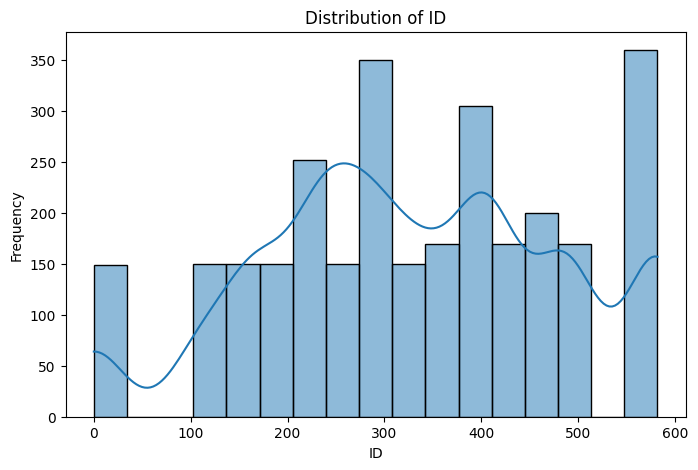

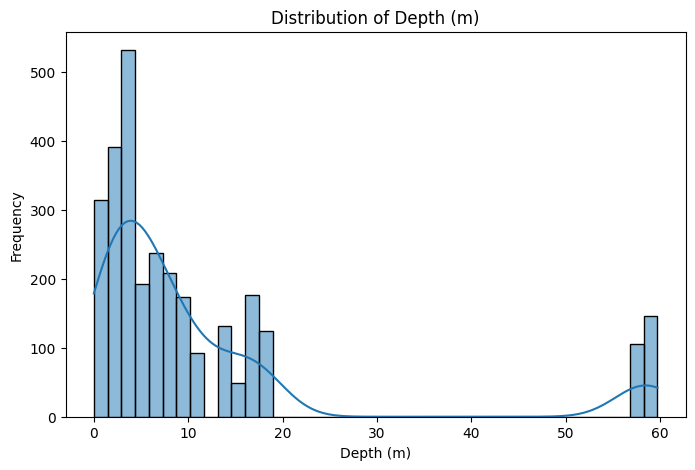

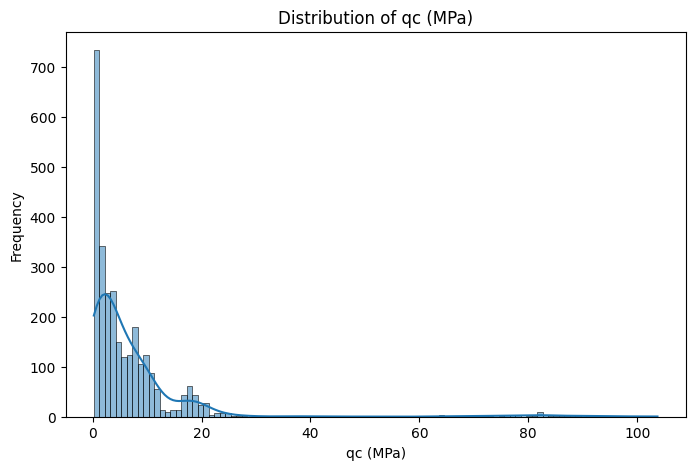

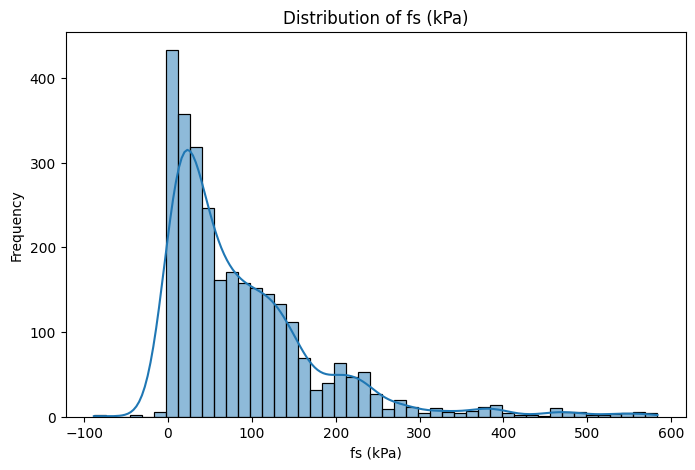

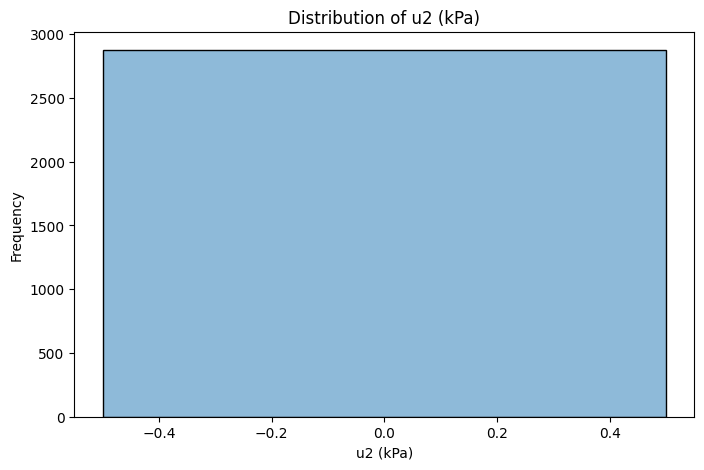

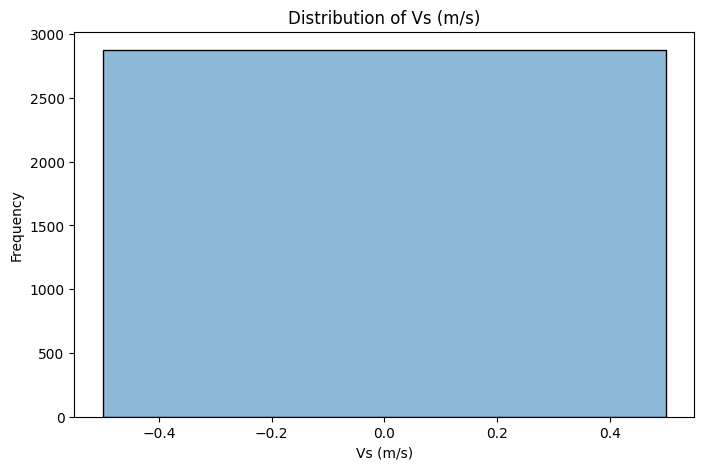

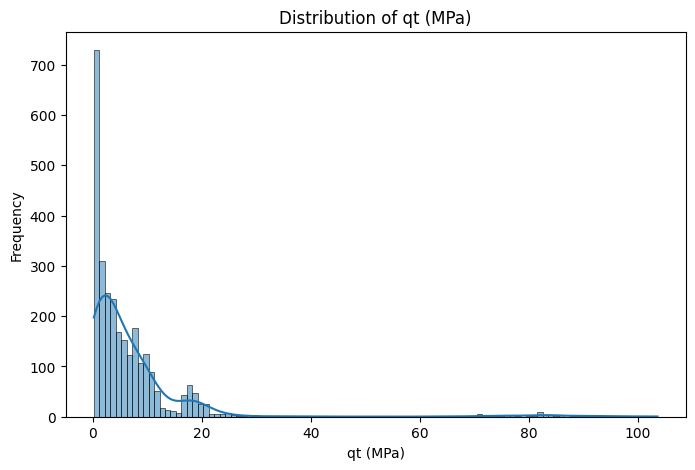

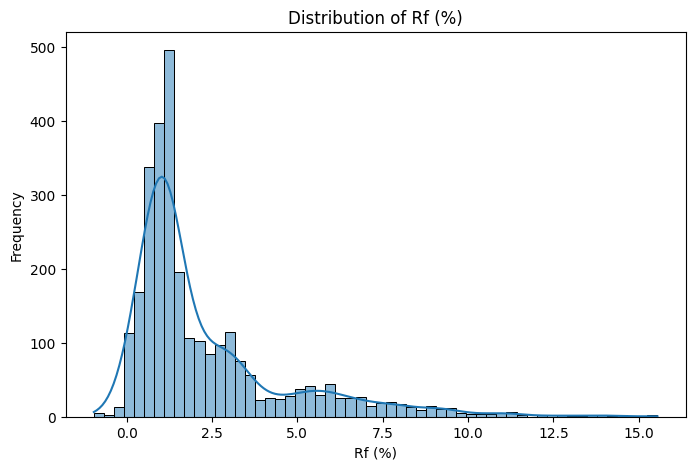

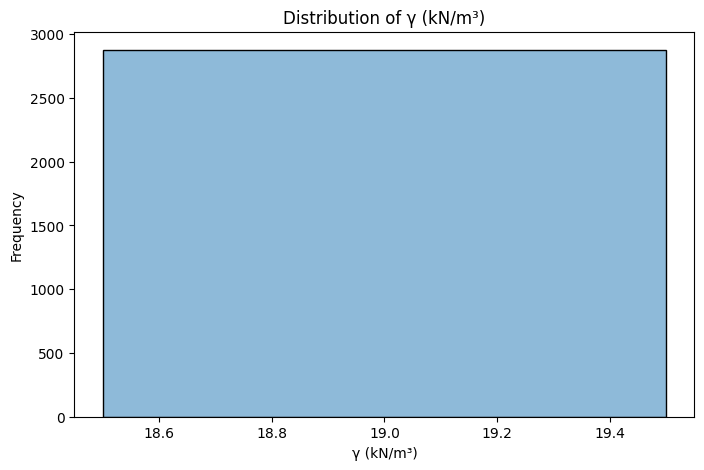

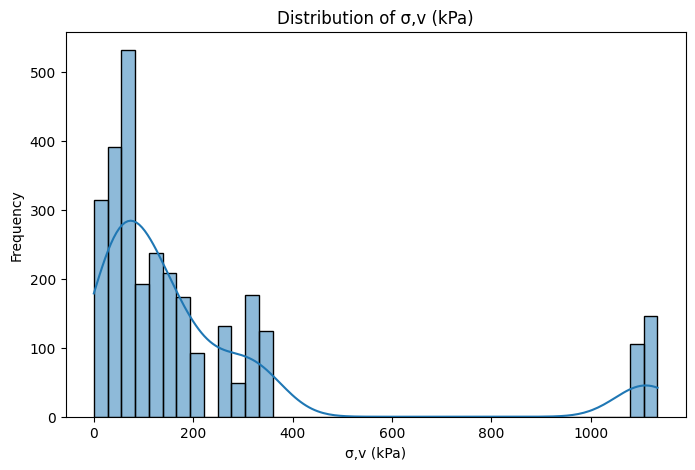

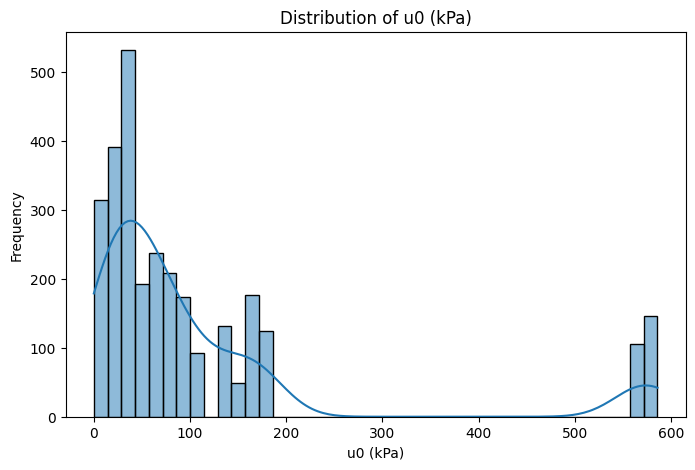

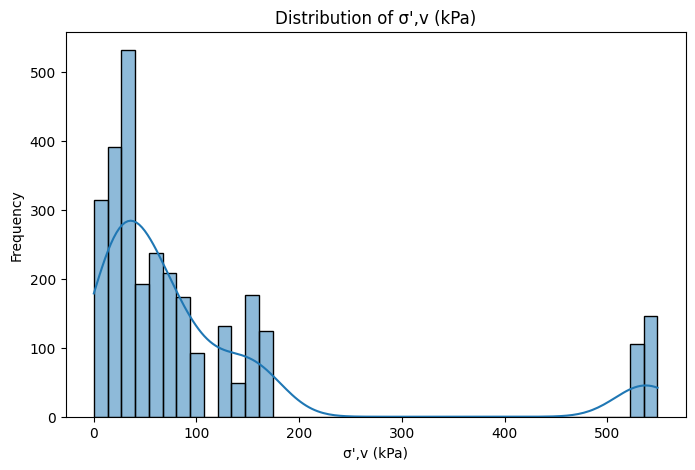

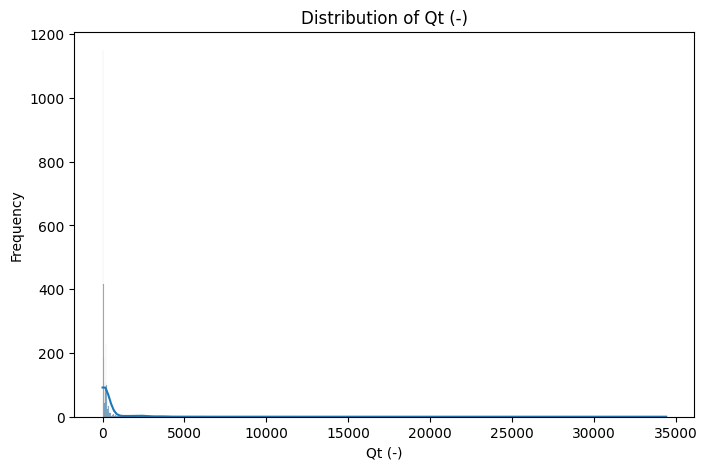

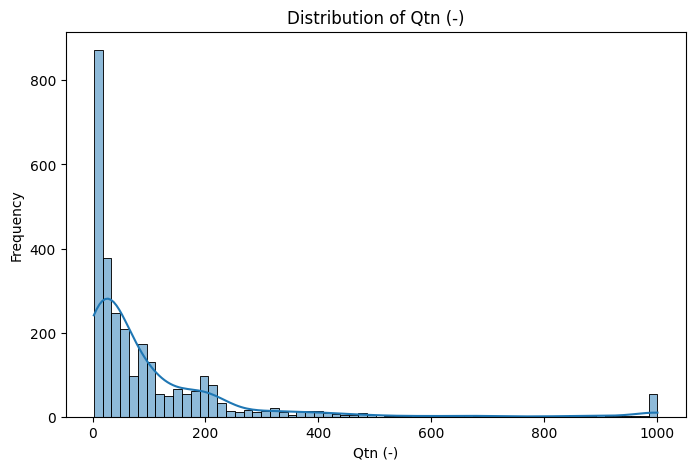

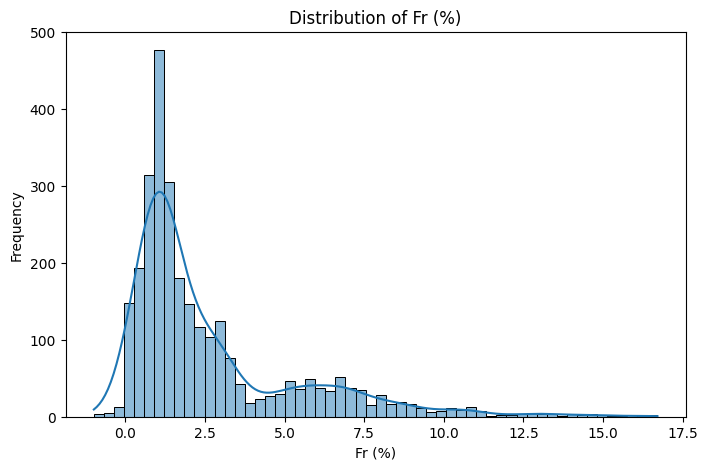

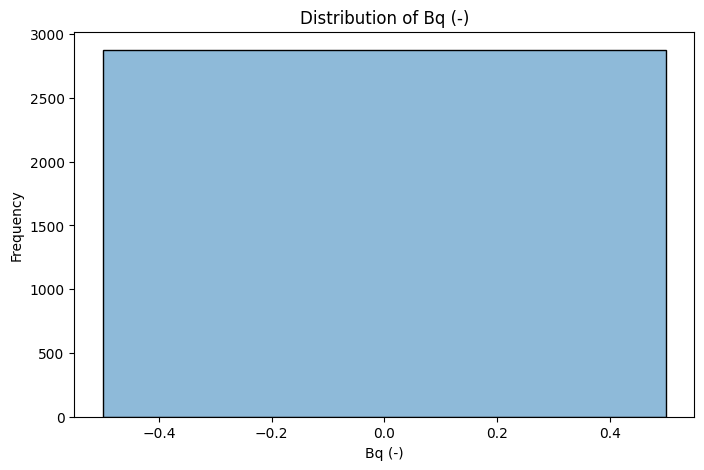

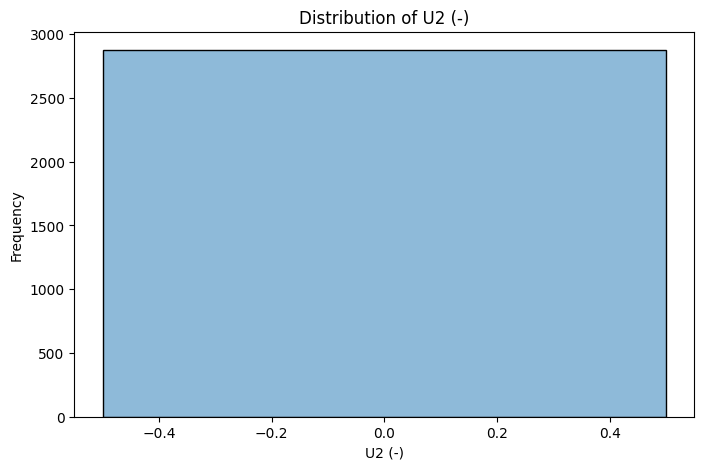

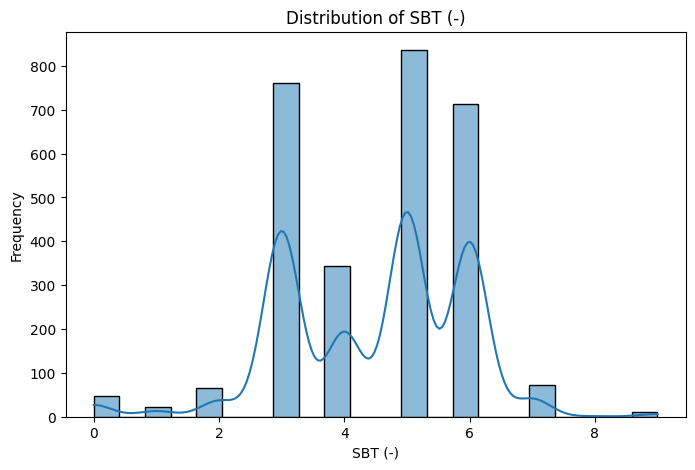

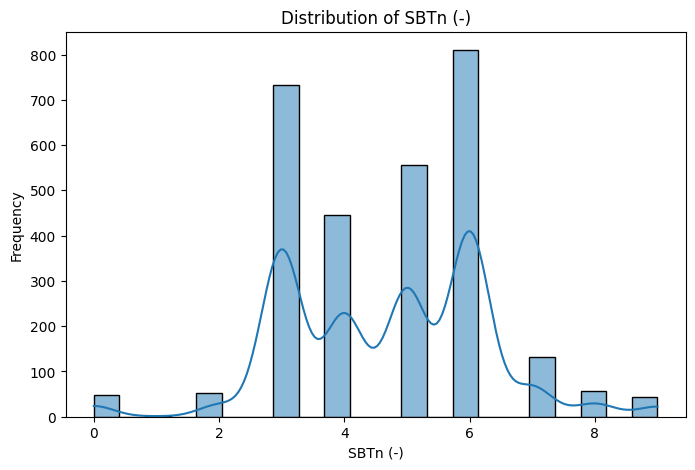

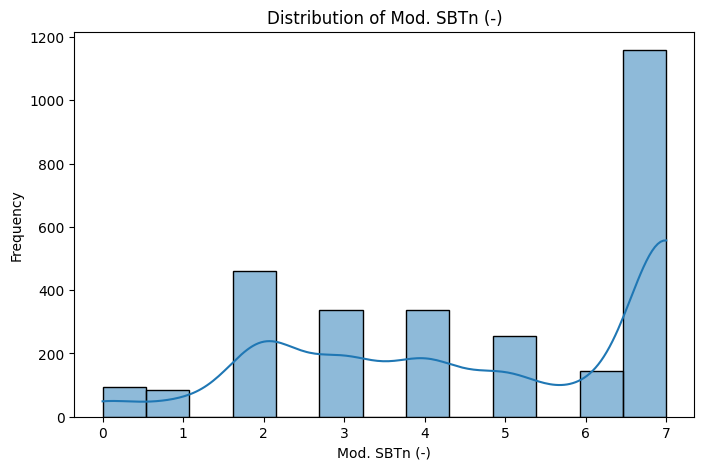

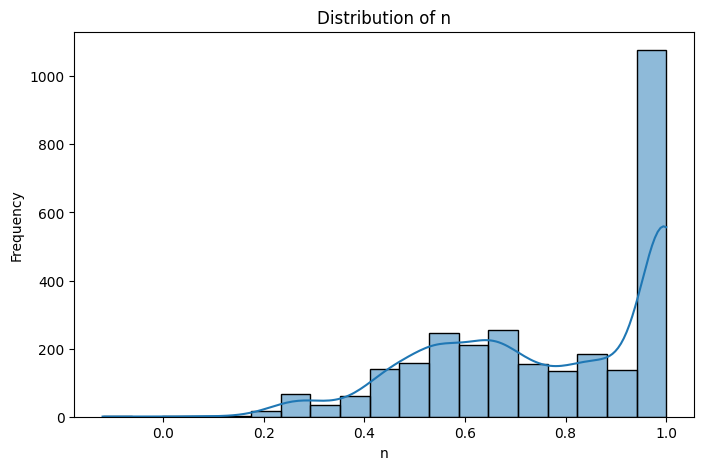

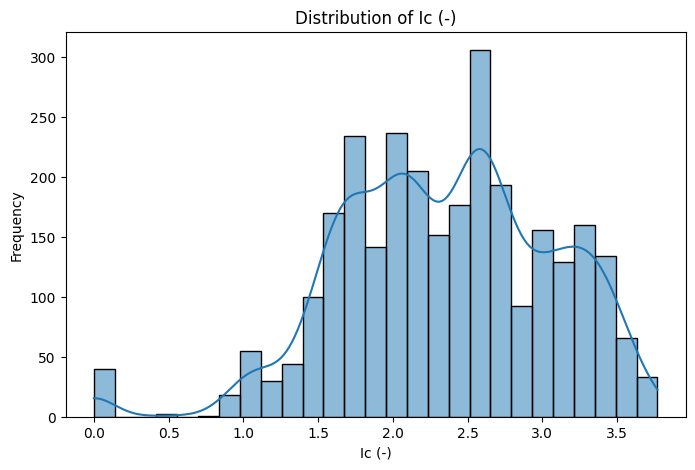

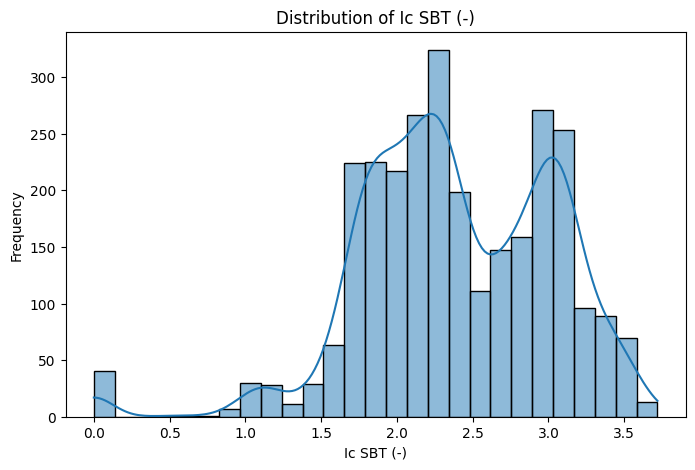

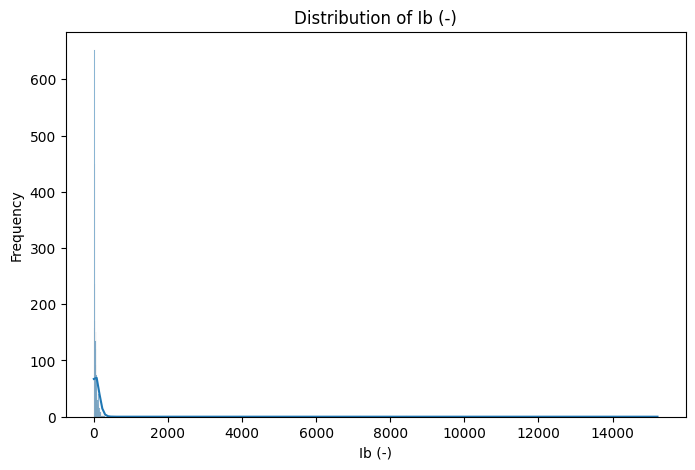

In [ ]:
# 1. Exploring the distribution of each feature
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

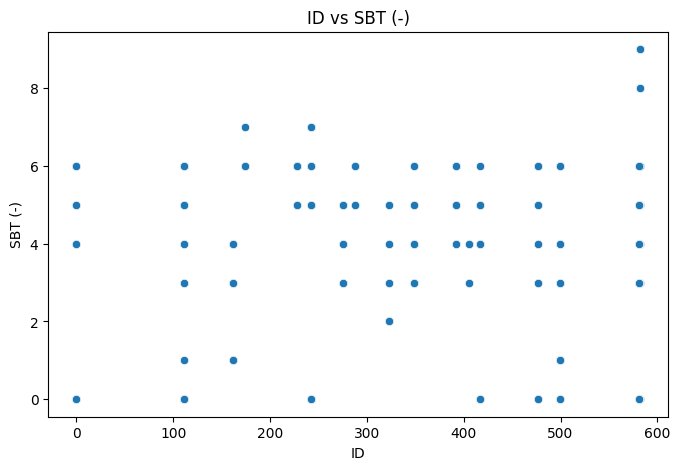

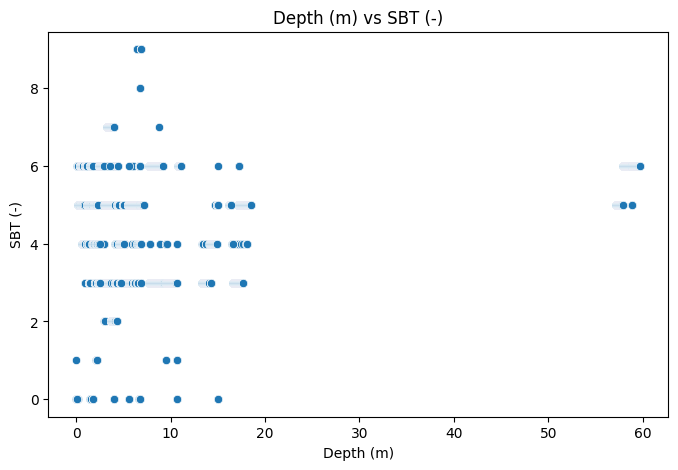

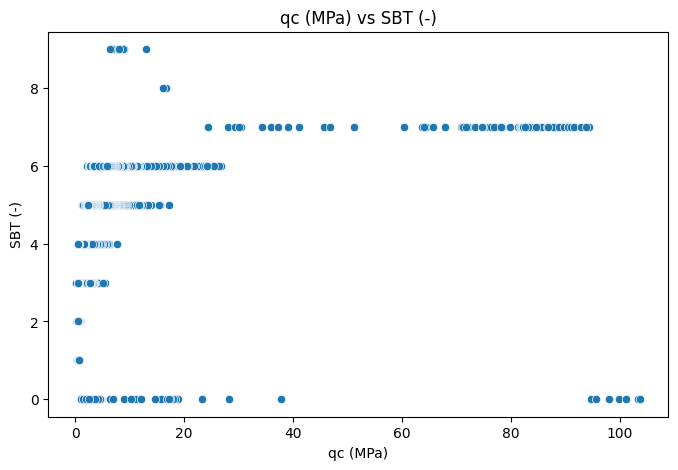

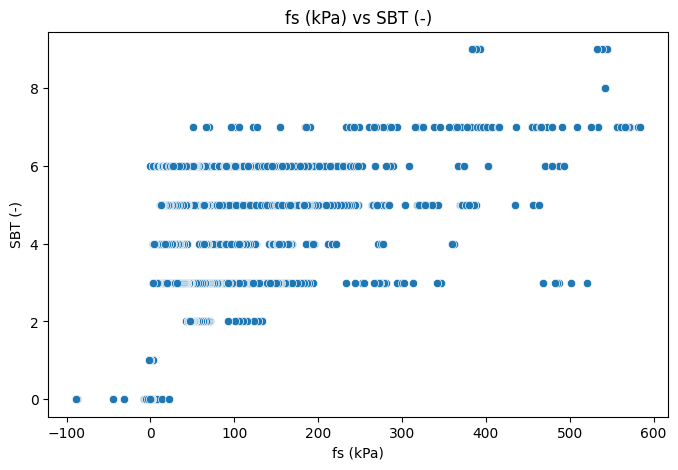

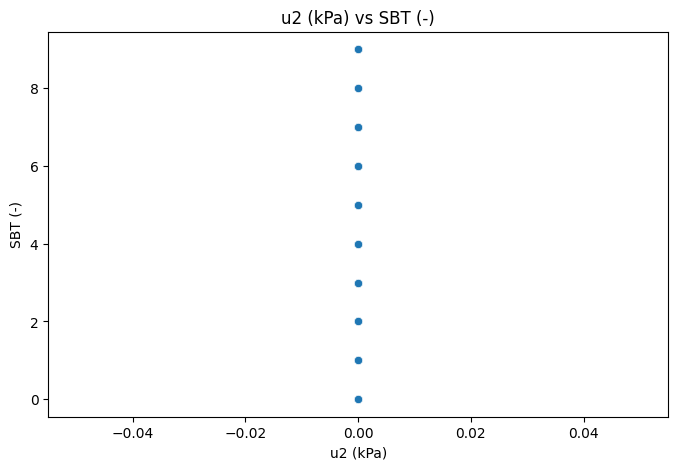

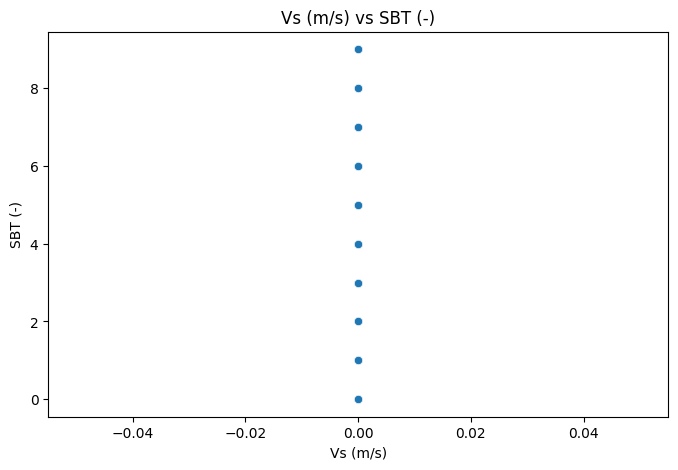

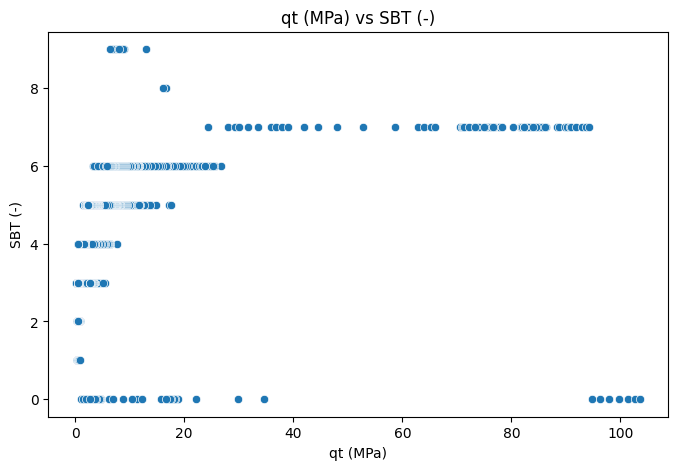

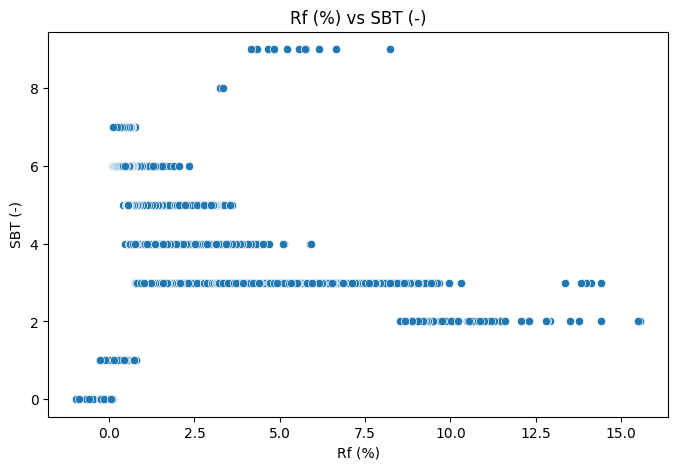

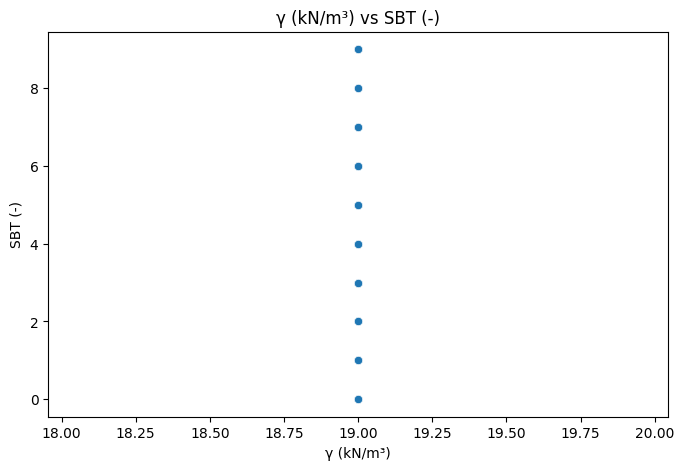

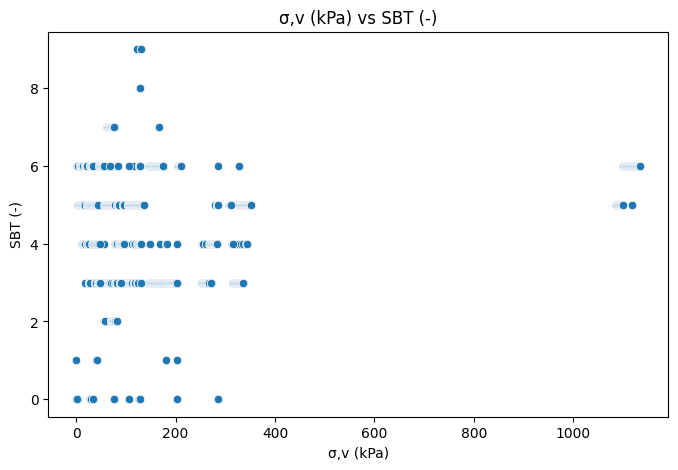

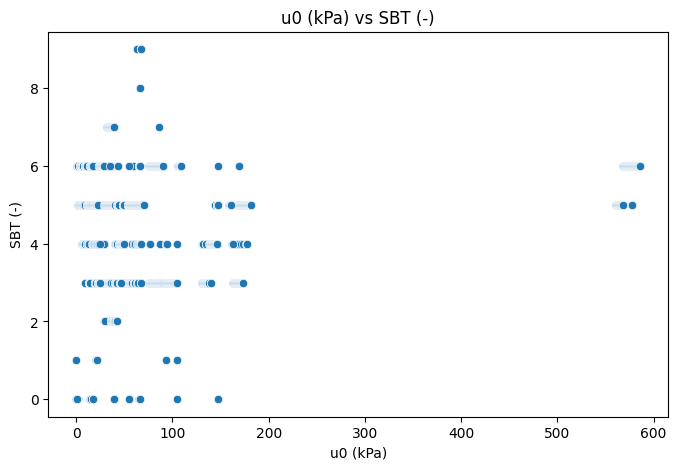

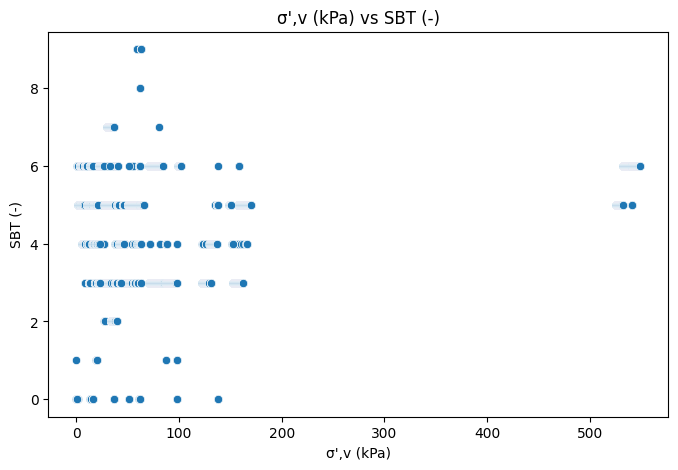

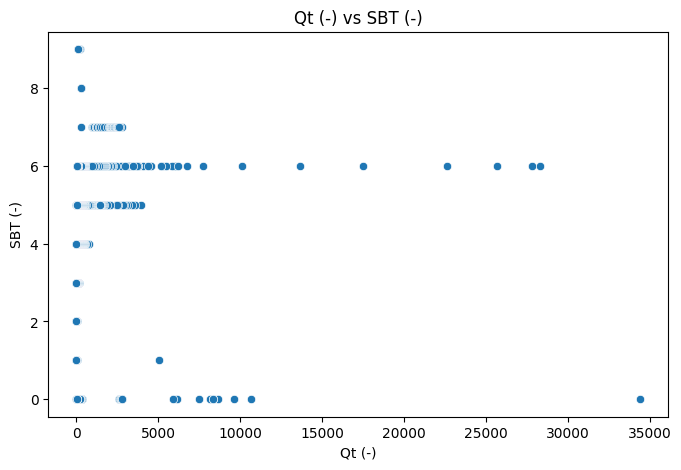

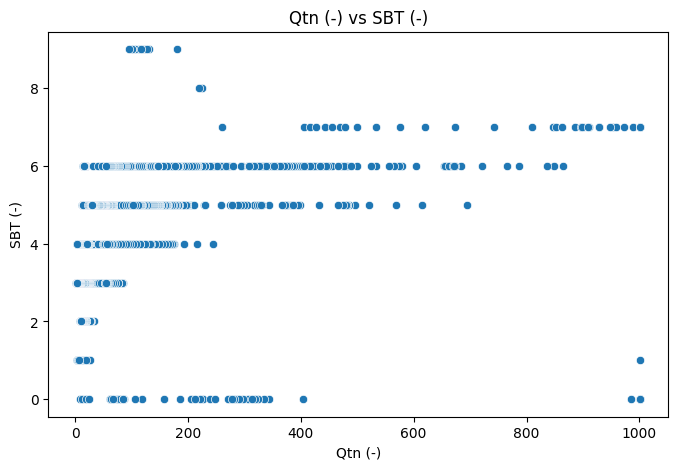

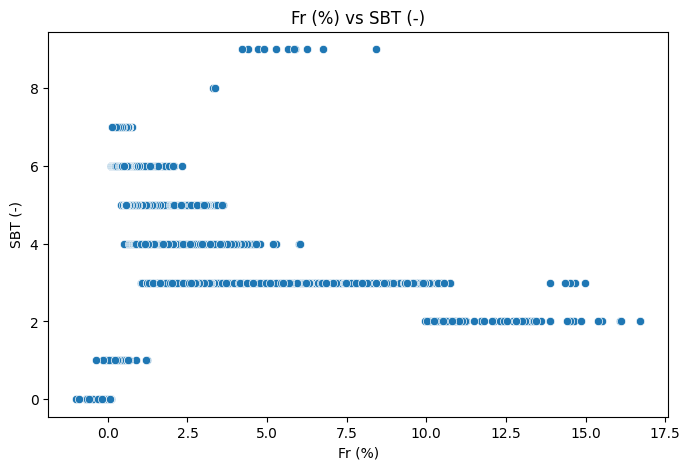

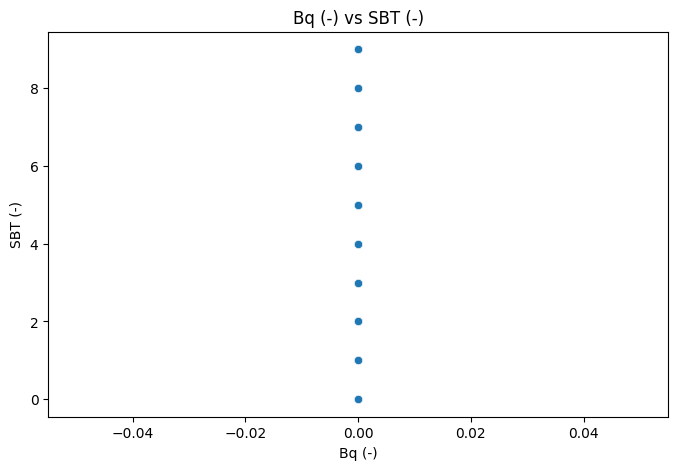

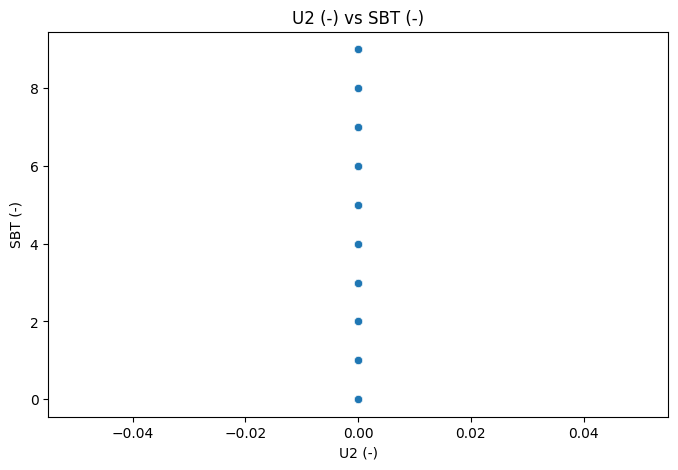

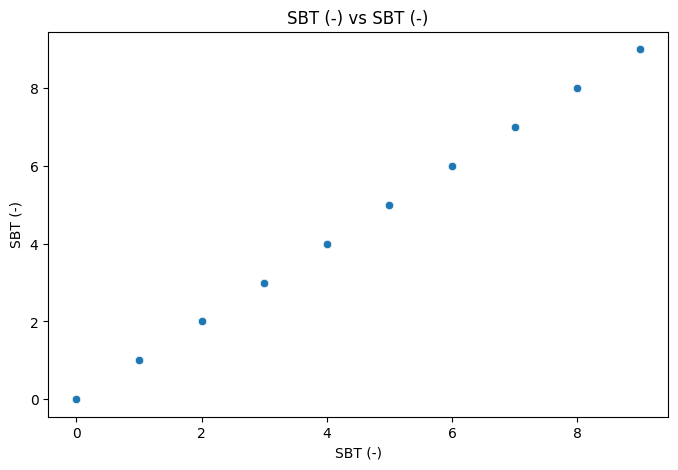

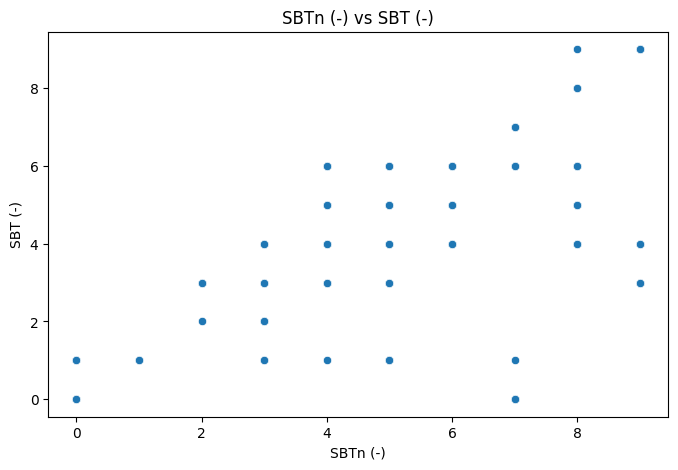

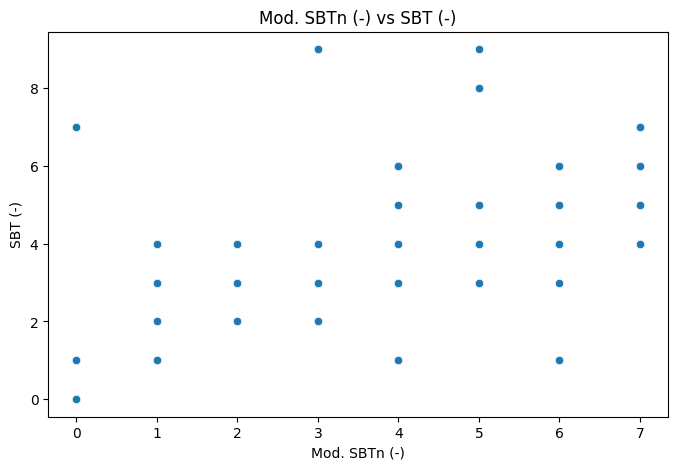

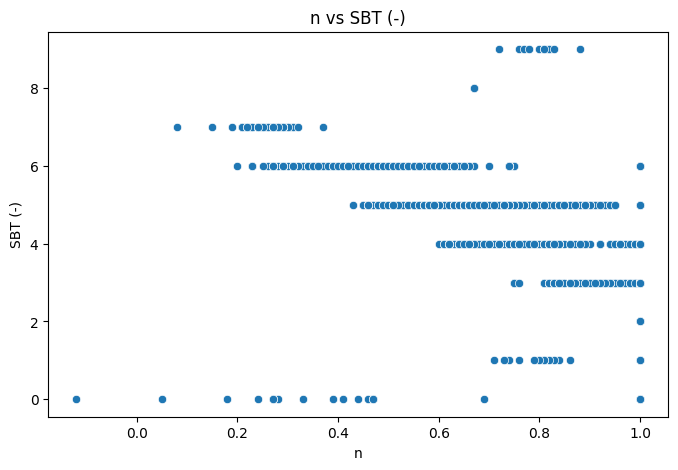

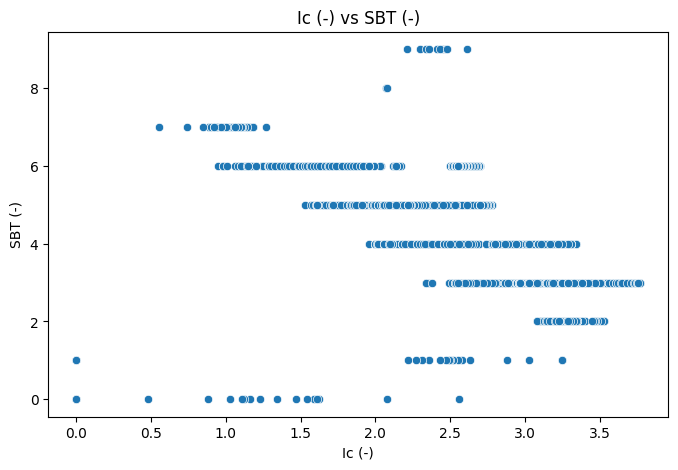

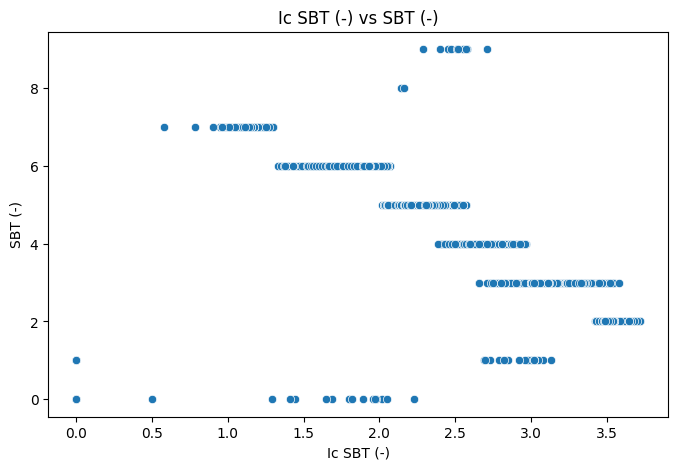

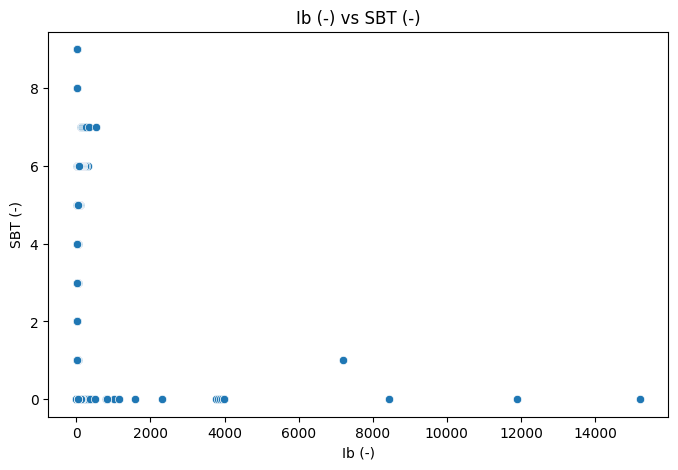

In [ ]:
# 2. Examining the relationships between features and the target variable
target_variable = 'SBT (-)'

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y=target_variable)
    plt.title(f"{feature} vs {target_variable}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()

In [3]:
# 3. Checking for missing values, outliers, and data inconsistencies
print("Missing Values:")
print(data.isnull().sum())


Missing Values:
ID               0
test_type        0
basin_valley     0
Depth (m)        0
qc (MPa)         0
fs (kPa)         0
u2 (kPa)         0
Vs (m/s)         0
qt (MPa)         0
Rf (%)           0
γ (kN/m³)        0
σ,v (kPa)        0
u0 (kPa)         0
σ',v (kPa)       0
Qt (-)           0
Qtn (-)          0
Fr (%)           0
Bq (-)           0
U2 (-)           0
SBT (-)          0
SBTn (-)         0
Mod. SBTn (-)    0
n                0
Ic (-)           0
Ic SBT (-)       0
Ib (-)           0
dtype: int64


In [4]:
# Checking for missing values, outliers, and data inconsistencies
print(data.isnull().sum())
print(data.describe())

ID               0
test_type        0
basin_valley     0
Depth (m)        0
qc (MPa)         0
fs (kPa)         0
u2 (kPa)         0
Vs (m/s)         0
qt (MPa)         0
Rf (%)           0
γ (kN/m³)        0
σ,v (kPa)        0
u0 (kPa)         0
σ',v (kPa)       0
Qt (-)           0
Qtn (-)          0
Fr (%)           0
Bq (-)           0
U2 (-)           0
SBT (-)          0
SBTn (-)         0
Mod. SBTn (-)    0
n                0
Ic (-)           0
Ic SBT (-)       0
Ib (-)           0
dtype: int64
               ID   Depth (m)    qc (MPa)    fs (kPa)  u2 (kPa)  Vs (m/s)  \
count  344.000000  344.000000  344.000000  344.000000     344.0     344.0   
mean   200.918605    6.047674   15.951366  107.507558       0.0       0.0   
std    122.251709    5.534412   27.897086  130.938576       0.0       0.0   
min      0.000000    0.020000    0.210000    0.000000       0.0       0.0   
25%    111.000000    2.715000    0.550000    9.200000       0.0       0.0   
50%    174.000000    3.835000  

**Feature Engineering**

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [6]:
# Define numerical and categorical features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['test_type', 'basin_valley']

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply dimensionality reduction if needed (example using PCA)
pca = PCA(n_components=10)

# Combine preprocessing and dimensionality reduction (if needed) into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca)])

# Apply preprocessing and dimensionality reduction to the data
processed_data = pipeline.fit_transform(data)

# Display the shape of the processed data
print("Shape of processed data:", processed_data.shape)

Shape of processed data: (344, 10)


**Predictive Modelling**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Features
X = data[['Depth (m)', 'qc (MPa)', 'fs (kPa)', 'u2 (kPa)', 'Vs (m/s)']]

# Target variable
y = data[['SBT (-)', 'Ic SBT (-)']]


In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize baseline models
random_forest = RandomForestRegressor(random_state=42)
xgboost = XGBRegressor(random_state=42)
dnn = MLPRegressor(random_state=42)

In [11]:
# Train baseline models
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
dnn.fit(X_train, y_train)

MLPRegressor(random_state=42)

In [12]:
# Make predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)
y_pred_dnn = dnn.predict(X_test)

# Evaluate model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_dnn = mean_squared_error(y_test, y_pred_dnn)

r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_dnn = r2_score(y_test, y_pred_dnn)

print("Random Forest:")
print("MSE:", mse_rf)
print("R-squared:", r2_rf)

print("\nXGBoost:")
print("MSE:", mse_xgb)
print("R-squared:", r2_xgb)

print("\nDNN:")
print("MSE:", mse_dnn)
print("R-squared:", r2_dnn)


Random Forest:
MSE: 0.014512525000000005
R-squared: 0.9944416097468929

XGBoost:
MSE: 0.018916699097508864
R-squared: 0.9925269261224081

DNN:
MSE: 19.656017711812332
R-squared: -8.451462971476715
